In [2]:
import pandas as pd

In [3]:
all_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/all_file/all_file.parquet", "fastparquet")
all_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   source_code   94288 non-null  object
 1   source_idx    94288 non-null  int64 
 2   compile_info  94288 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [5]:
all_file["compile_info"].describe()

count                       94288
unique                          1
top       <COMPILED_SUCCESSFULLY>
freq                        94288
Name: compile_info, dtype: object

In [1]:
import pandas as pd
contracts = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/contracts/contracts_filtered.parquet", engine="fastparquet")
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118663 entries, 0 to 118662
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   source_idx       118663 non-null  object
 1   contract_name    118663 non-null  object
 2   contract_source  118663 non-null  object
 3   count            118663 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [7]:
import pandas as pd
contracts_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/contracts/contracts_v2.parquet",  engine="fastparquet")
contracts_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118663 entries, 0 to 118662
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   source_idx       118663 non-null  object
 1   contract_name    118663 non-null  object
 2   contract_source  118663 non-null  object
 3   contract_ast     118663 non-null  object
 4   count            118663 non-null  object
dtypes: object(5)
memory usage: 4.5+ MB


In [8]:
contracts_v2['contract_ast']

0         {"type":"SourceUnit","children":[{"type":"Cont...
1         {"type":"SourceUnit","children":[{"type":"Cont...
2         {"type":"SourceUnit","children":[{"type":"Cont...
3         {"type":"SourceUnit","children":[{"type":"Cont...
4         {"type":"SourceUnit","children":[{"type":"Cont...
                                ...                        
118658    {"type":"SourceUnit","children":[{"type":"Cont...
118659    {"type":"SourceUnit","children":[{"type":"Cont...
118660    {"type":"SourceUnit","children":[{"type":"Cont...
118661    {"type":"SourceUnit","children":[{"type":"Cont...
118662    {"type":"SourceUnit","children":[{"type":"Cont...
Name: contract_ast, Length: 118663, dtype: object

In [9]:
contracts_v2[contracts_v2["contract_ast"] == "<PARSER_ERROR>"]

,source_idx,contract_name,contract_source,contract_ast,count


In [1]:
import pandas as pd
deepseek = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/deepseek_v1.parquet", engine="fastparquet")
deepseek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28001 entries, 0 to 28000
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              28001 non-null  object
 1   func_name                  21342 non-null  object
 2   masked_contract            28001 non-null  object
 3   func_body                  28001 non-null  object
 4   func_body_removed_comment  28001 non-null  object
 5   deepseek_output            28001 non-null  object
 6   file_source_idx            28001 non-null  object
 7   source_code                28001 non-null  object
 8   source_idx                 28001 non-null  int64 
 9   compile_info               28001 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.1+ MB


In [2]:
import pandas as pd
test_suite = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test_suite_6k.parquet", engine="fastparquet")
test_suite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   file_source                6000 non-null   object
 8   filled_source_body         6000 non-null   object
 9   filled_source_deepseek     6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [3]:
test_suite[test_suite["filled_source_deepseek"].isnull()]

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,file_source,filled_source_body,filled_source_deepseek


In [4]:
test_suite["filled_source_deepseek"]

0       pragma solidity ^0.4.19;\n\ncontract SafeMath ...
1       pragma solidity 0.4.26;\n\n/**\n* Get % profit...
2       // SPDX-License-Identifier: MIT\n\npragma soli...
3       pragma solidity ^0.4.24;\n\n/**\n * Math opera...
4       pragma solidity ^0.4.24;/**\n * @title SafeMat...
                              ...                        
5995    // SPDX-License-Identifier: MIT\n\npragma soli...
5996    pragma solidity ^0.4.23;\n\ncontract Token {\n...
5997    pragma solidity ^0.5.0;\n\n\n// --------------...
5998    pragma solidity ^0.4.21;\n\n/**\n * @title Lin...
5999    pragma solidity ^0.5.0;\n\n\ncontract ERC20Int...
Name: filled_source_deepseek, Length: 6000, dtype: object

In [6]:
import pandas as pd
body = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/test_6k_v1/body.parquet", engine="fastparquet")
body.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   file_source_idx            6000 non-null   int64 
 6   source_code                6000 non-null   object
 7   source_idx                 6000 non-null   int64 
 8   compile_info               6000 non-null   object
dtypes: int64(2), object(7)
memory usage: 422.0+ KB


In [7]:
body[~(body["compile_info"] == "<COMPILED_SUCCESSFULLY>")]

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,file_source_idx,source_code,source_idx,compile_info
109,TMTGOwnable,None,contract TMTGOwnable {\n address public own...,\r\n owner = msg.sender; \r\n ...,\n owner = msg.sender; \n ce...,86353,pragma solidity ^0.4.24;\n\n\ncontract ERC20Ba...,109,DocstringParsingError: No description given fo...
630,TMTGOwnable,transferOwnership,contract TMTGOwnable {\n address public own...,\r\n emit TMTG_RoleTransferred(Role.own...,\n emit TMTG_RoleTransferred(Role.owner...,42821,pragma solidity ^0.4.24;\n\n\ncontract ERC20Ba...,630,DocstringParsingError: No description given fo...
1823,ERC20,None,"contract ERC20 is Context, TRC20 {\n using ...",\r\n _balances[msg.sender] = _totalSupp...,\n _balances[msg.sender] = _totalSupply...,44597,/*\n\n\n_____/\\\\\\\\\\\____/\\\________/\\\_...,1823,DocstringParsingError: No description given fo...
1868,TMTGBlacklist,unblacklist,contract TMTGBlacklist is TMTGOwnable {\n m...,\r\n blacklisted[node] = false;\r\n ...,\n blacklisted[node] = false;\n ...,86353,pragma solidity ^0.4.24;\n\n\ncontract ERC20Ba...,1868,DocstringParsingError: No description given fo...
2332,TMTGBaseToken,reclaimToken,"contract TMTGBaseToken is StandardToken, TMTGP...","\r\n transfer(owner, balanceOf(this));\...","\n transfer(owner, balanceOf(this));\n",86353,pragma solidity ^0.4.24;\n\n\ncontract ERC20Ba...,2332,DocstringParsingError: No description given fo...
4124,FiLinkToken,FiLinkToken,contract FiLinkToken is StandardToken {\n\r\n ...,\r\n\r\n totalSupply_ = INITIAL_SUPPLY;...,\n\n totalSupply_ = INITIAL_SUPPLY;\n\n...,64446,pragma solidity ^0.4.18;\n\n/**\n\n* @title ER...,4124,contracts/sample.sol:392:5: Warning: Defining ...
5922,TokenERC20,approveAndCall,contract TokenERC20 {\n string public name;...,\r\n tokenRecipient spender = tokenReci...,\n tokenRecipient spender = tokenRecipi...,2594,pragma solidity ^0.4.25;\n\ninterface tokenRec...,5922,contracts/sample.sol:25:5: Warning: Defining c...


In [15]:
with open("check.sol", "w") as f:
    f.write(body.loc[109, "func_body"])
    f.write("\n________________________________________________________________________________________\n")
    f.write(body.loc[109, "source_code"])

body.loc[109, "compile_info"]

'DocstringParsingError: No description given for param newOwner\n\nError HH600: Compilation failed\nHardhatError: HH600: Compilation failed\n    at SimpleTaskDefinition.action (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/hardhat/src/builtin-tasks/compile.ts:499:15)\n    at Environment._runTaskDefinition (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/hardhat/src/internal/core/runtime-environment.ts:358:14)\n    at OverriddenTaskDefinition._action (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/@typechain/hardhat/src/index.ts:28:30)\n    at Environment._runTaskDefinition (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/hardhat/src/internal/core/runtime-environment.ts:358:14)\n    at Environment.run (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/hardhat/src/internal/core/runtime-environment.ts:191:14)\n    at SimpleTaskDefinition.action (/home/hieuvd/l

In [8]:
with open("check1.sol", "w") as f:
    f.write(all_file.loc[86353, "source_code"])

In [19]:
all_file.loc[863, "source_code"]

'pragma solidity ^0.4.24;\r\n\r\n// ----------------------------------------------------------------------------\r\n// \'FIXED\' \'Example Fixed Supply Token\' token contract\r\n//\r\n// Symbol      : BETTER\r\n// Name        : Better Token\r\n// Total supply: 10,000,000,000.000000000000000000\r\n// Decimals    : 18\r\n//\r\n// Enjoy.\r\n//\r\n// (c) Better Token / mybettertoken.com 2018.\r\n// ----------------------------------------------------------------------------\r\n\r\n\r\n// ----------------------------------------------------------------------------\r\n// Safe maths\r\n// ----------------------------------------------------------------------------\r\nlibrary SafeMath {\r\n    function add(uint a, uint b) internal pure returns (uint c) {\r\n        c = a + b;\r\n        require(c >= a);\r\n    }\r\n    function sub(uint a, uint b) internal pure returns (uint c) {\r\n        require(b <= a);\r\n        c = a - b;\r\n    }\r\n    function mul(uint a, uint b) internal pure return

In [14]:
import pandas as pd
test = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test.parquet", "fastparquet")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   file_source                6000 non-null   object
dtypes: int64(1), object(7)
memory usage: 375.1+ KB


In [15]:
test.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,file_source
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye Token"";\n symbol = ""BT...",33106,pragma solidity ^0.4.19;\r\n\r\ncontract SafeM...
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,Ether = investment;\nemit LogSendExcessOfEther...,75941,pragma solidity 0.4.26;\r\n\r\n/**\r\n* Get % ...
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\r\n\r\npragma ...
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,72368,pragma solidity ^0.4.24;\r\n\r\n/**\r\n * Math...
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\r\n * @title SafeM...


In [11]:
body = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_6k_v1/body.parquet", "fastparquet")
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   file_source_idx            6000 non-null   int64 
 6   source_code                6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 328.3+ KB


In [3]:
import pandas as pd
train = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/train_suite.parquet", "fastparquet")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              100 non-null    object
 1   func_name                  76 non-null     object
 2   masked_contract            100 non-null    object
 3   func_body                  100 non-null    object
 4   func_body_removed_comment  100 non-null    object
 5   deepseek_output            100 non-null    object
 6   file_source_idx            100 non-null    object
 7   original_source_code       100 non-null    object
 8   filled_source_body         100 non-null    object
 9   filled_source_deepseek     100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [4]:
all_file_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file_v2.parquet", "fastparquet")
all_file_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
 1   ast          94288 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [6]:
check = all_file_v2[all_file_v2["ast"] == "<PARSER_ERROR>"]

In [1]:
import pandas as pd

train = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/train_6k/deepseek.parquet", "fastparquet")
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   object
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [2]:
train["compile_info"].describe()

count                        6000
unique                       2202
top       <COMPILED_SUCCESSFULLY>
freq                         3762
Name: compile_info, dtype: object

In [2]:
import pandas as pd
deepseek = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/train_6k/deepseek.parquet", "fastparquet")
deepseek.to_csv("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/train_6k/deepseek.csv")

In [3]:
deepseek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   object
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [4]:
deepseek.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,source_idx,compile_info
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye"";\n symbol = ""BTEYE"";\...",33106,pragma solidity ^0.4.19;\n\r\ncontract SafeMat...,0,<COMPILED_SUCCESSFULLY>
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,75941,pragma solidity 0.4.26;\n\r\n/**\r\n* Get % pr...,1,<COMPILED_SUCCESSFULLY>
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\n\r\npragma so...,2,<COMPILED_SUCCESSFULLY>
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(_to != 0x0); ...,72368,pragma solidity ^0.4.24;\n\r\n/**\r\n * Math o...,3,contracts/sample.sol:145:24: ParserError: Expe...
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\n * @title SafeMat...,4,<COMPILED_SUCCESSFULLY>


In [7]:
deepseek = deepseek.drop(columns=["source_idx", "source_code", "file_source_idx", "func_body_removed_comment", "contract_name", "func_name"])
deepseek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   masked_contract  6000 non-null   object
 1   func_body        6000 non-null   object
 2   deepseek_output  6000 non-null   object
 3   compile_info     6000 non-null   object
dtypes: object(4)
memory usage: 187.6+ KB


In [8]:
deepseek.to_csv("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/train_6k/deepseek.csv")

In [10]:
import string
def normalized(s):
    s = s.replace(string.whitespace, " ")
    s = " ".join(s.split())
    return s

deepseek["deepseek_output"] = deepseek["deepseek_output"].apply(lambda x: normalized(x))


In [11]:
deepseek["len_output"] = deepseek["deepseek_output"].apply(lambda x: len(x.split()))

In [12]:
deepseek["len_output"].describe()

count    6000.000000
mean       14.464667
std        11.268181
min         0.000000
25%         5.000000
50%        13.000000
75%        21.000000
max       119.000000
Name: len_output, dtype: float64

In [14]:
from collections import Counter

counter = Counter(deepseek["len_output"].tolist())
counter[0]

19

In [1]:
import pandas as pd
test_6k = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_6k/raw_test_6k.parquet", engine="fastparquet")
test_6k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   file_source                6000 non-null   object
dtypes: int64(1), object(7)
memory usage: 375.1+ KB


In [2]:
test_6k.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,file_source
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye Token"";\n symbol = ""BT...",33106,pragma solidity ^0.4.19;\r\n\r\ncontract SafeM...
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,Ether = investment;\nemit LogSendExcessOfEther...,75941,pragma solidity 0.4.26;\r\n\r\n/**\r\n* Get % ...
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\r\n\r\npragma ...
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,72368,pragma solidity ^0.4.24;\r\n\r\n/**\r\n * Math...
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\r\n * @title SafeM...


In [3]:
all_file_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file_v2.parquet", "fastparquet")
all_file_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
 1   ast          94288 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [4]:
cnt = 0
for i in test_6k.index:
    if all_file_v2.loc[test_6k.loc[i, "file_source_idx"], "ast"] == "<PARSER_ERROR>":
        cnt += 1
        print(i)

cnt        

0

In [5]:
valid = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/valid_6k/deepseek.parquet", "fastparquet")
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [6]:
valid["compile_info"].describe()

count                        6000
unique                       1883
top       <COMPILED_SUCCESSFULLY>
freq                         4049
Name: compile_info, dtype: object

In [7]:
valid1 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/valid_6k_bak/deepseek.parquet",  "fastparquet")
valid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   object
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [8]:
valid1["compile_info"].describe()

count                        6000
unique                       2078
top       <COMPILED_SUCCESSFULLY>
freq                         3885
Name: compile_info, dtype: object

In [9]:
train = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/train_6k/deepseek.parquet", engine="fastparquet")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [10]:
train["compile_info"].describe()

count                        6000
unique                       1975
top       <COMPILED_SUCCESSFULLY>
freq                         3934
Name: compile_info, dtype: object

In [40]:
refine2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/valid_6k/deepseek.parquet", "fastparquet")
refine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [41]:
refine2["compile_info"].describe()

count                        6000
unique                       1865
top       <COMPILED_SUCCESSFULLY>
freq                         4050
Name: compile_info, dtype: object

In [24]:
test_suite1 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/train_6k/test_suite1.parquet", "fastparquet")
test_suite1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   object
 7   original_source_code       6000 non-null   object
 8   filled_source_body         6000 non-null   object
 9   filled_source_deepseek     6000 non-null   object
dtypes: object(10)
memory usage: 468.9+ KB


In [26]:
test_suite = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/train_6k/test_suite.parquet")
test_suite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   file_source                6000 non-null   object
 8   filled_source_body         6000 non-null   object
 9   filled_source_deepseek     6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [27]:
test_suite1["filled_source_deepseek"] == test_suite["filled_source_deepseek"]

0       False
1       False
2       False
3       False
4       False
        ...  
5995     True
5996    False
5997    False
5998    False
5999    False
Name: filled_source_deepseek, Length: 6000, dtype: bool

In [31]:
i = 1
with open("check.sol", "w") as f:
    f.write(test_suite1.loc[i, "filled_source_deepseek"])
with open("check1.sol", "w") as f:
    f.write(test_suite.loc[i, "filled_source_deepseek"])

test_suite.loc[i, ["contract_name", "func_name"]]

contract_name    HadsofFortune
func_name                 init
Name: 1, dtype: object

In [6]:
import pandas as pd

refine2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/refine2_6k/deepseek_finetune.parquet", "fastparquet")
refine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   object
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(1), object(9)
memory usage: 468.9+ KB


In [7]:
finetune_6k["file_source_idx"]

0       33106
1       75941
2       40393
3       72368
4       38328
        ...  
5995     2287
5996    83488
5997    30938
5998    13260
5999    20015
Name: file_source_idx, Length: 6000, dtype: object

In [8]:
all_file_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file_v2.parquet", "fastparquet")
all_file_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
 1   ast          94288 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [9]:
finetune_6k["file_source_idx"] = finetune_6k["file_source_idx"].astype("int64")

In [10]:
finetune_6k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [11]:
finetune_6k["ast"] = finetune_6k["file_source_idx"].apply(lambda x: all_file_v2.loc[x, "ast"])

In [12]:
finetune_6k.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,source_idx,compile_info,ast
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye Token"";\n symbol = ""BT...",33106,pragma solidity ^0.4.19;\n\r\ncontract SafeMat...,0,<COMPILED_SUCCESSFULLY>,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,Ether = investment;\nemit LogSendExcessOfEther...,75941,pragma solidity 0.4.26;\n\r\n/**\r\n* Get % pr...,1,contracts/sample.sol:508:1: ParserError: Funct...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\n\r\npragma so...,2,contracts/sample.sol:1046:61: ParserError: Exp...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,72368,pragma solidity ^0.4.24;\n\r\n/**\r\n * Math o...,3,contracts/sample.sol:145:43: ParserError: Expe...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\n * @title SafeMat...,4,<COMPILED_SUCCESSFULLY>,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."


In [13]:
with open("/home/hieuvd/lvdthieu/CodeGen/parse_sample.json", "w") as f:
    f.write(finetune_6k.loc[0, "ast"])
with open("/home/hieuvd/lvdthieu/CodeGen/parse_sample.sol", "w") as f:
    f.write(finetune_6k.loc[0, "source_code"])

In [7]:
import pandas as pd

refine2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/refine2_6k/deepseek.parquet", "fastparquet")
refine2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   source_idx                 6000 non-null   int64 
 9   compile_info               6000 non-null   object
dtypes: int64(2), object(8)
memory usage: 468.9+ KB


In [5]:
all_file_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file_v2.parquet", "fastparquet")
all_file_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
 1   ast          94288 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [8]:
refine2.drop(columns=["source_idx"], inplace=True)

In [9]:
refine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   compile_info               6000 non-null   object
dtypes: int64(1), object(8)
memory usage: 422.0+ KB


In [16]:
refine2["origin"], refine2["ast"] = zip(*refine2["file_source_idx"].apply(lambda x: (all_file_v2.loc[x, "source_code"], all_file_v2.loc[x, "ast"])))

In [17]:
refine2.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,compile_info,origin,ast
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye"";\n symbol = ""BTEYE"";\...",33106,pragma solidity ^0.4.19;\n\ncontract SafeMath ...,<COMPILED_SUCCESSFULLY>,pragma solidity ^0.4.19;\r\n\r\ncontract SafeM...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,75941,pragma solidity 0.4.26;\n\n/**\n* Get % profit...,<COMPILED_SUCCESSFULLY>,pragma solidity 0.4.26;\r\n\r\n/**\r\n* Get % ...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\n\npragma soli...,<COMPILED_SUCCESSFULLY>,// SPDX-License-Identifier: MIT\r\n\r\npragma ...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(_to != 0x0); ...,72368,pragma solidity ^0.4.24;\n\n/**\n * Math opera...,contracts/sample.sol:145:24: ParserError: Expe...,pragma solidity ^0.4.24;\r\n\r\n/**\r\n * Math...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\n * @title SafeMat...,<COMPILED_SUCCESSFULLY>,pragma solidity ^0.4.24;/**\r\n * @title SafeM...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag..."


In [18]:
result = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/result.parquet", "fastparquet")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              6000 non-null   object
 1   func_name                  4522 non-null   object
 2   masked_contract            6000 non-null   object
 3   func_body                  6000 non-null   object
 4   func_body_removed_comment  6000 non-null   object
 5   deepseek_output            6000 non-null   object
 6   file_source_idx            6000 non-null   int64 
 7   source_code                6000 non-null   object
 8   compile_info               6000 non-null   object
 9   origin                     6000 non-null   object
 10  ast                        6000 non-null   object
 11  inherit_elements           6000 non-null   object
dtypes: int64(1), object(11)
memory usage: 562.6+ KB


In [19]:
result.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,compile_info,origin,ast,inherit_elements
0,BitEyeToken,BitEyeToken,"contract BitEyeToken is ERC20Token, Ownable {\...","\r\n name = ""BitEye Token"";\r\n symbol =...","\n name = ""BitEye Token"";\n symbol = ""BE...","\n name = ""BitEye"";\n symbol = ""BTEYE"";\...",33106,pragma solidity ^0.4.19;\n\ncontract SafeMath ...,<COMPILED_SUCCESSFULLY>,pragma solidity ^0.4.19;\r\n\r\ncontract SafeM...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag...","['string public name;', 'string public symbol;..."
1,HadsofFortune,init,contract HadsofFortune is Accessibility {\nusi...,\r\n\r\nm_rgp.startTimestamp = timestamp + 1;\...,\n\nm_rgp.startTimestamp = timestamp + 1;\nemi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,75941,pragma solidity 0.4.26;\n\n/**\n* Get % profit...,<COMPILED_SUCCESSFULLY>,pragma solidity 0.4.26;\r\n\r\n/**\r\n* Get % ...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag...","['constructor() public {<BODY>}', 'function To..."
2,HintHelpers,setAddresses,"contract HintHelpers is LiquityBase, Ownable, ...",\r\n checkContract(_sortedTrovesAddress...,\n checkContract(_sortedTrovesAddress);...,\n require(_sortedTrovesAddress != addr...,40393,// SPDX-License-Identifier: MIT\n\npragma soli...,<COMPILED_SUCCESSFULLY>,// SPDX-License-Identifier: MIT\r\n\r\npragma ...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag...",['uint constant public _100pct = 1000000000000...
3,BEU,lock,contract BEU {\n using SafeMath for uint256...,\r\n require(msg.sender == owner); ...,\n require(msg.sender == owner); ...,\n require(_to != 0x0); ...,72368,pragma solidity ^0.4.24;\n\n/**\n * Math opera...,contracts/sample.sol:145:24: ParserError: Expe...,pragma solidity ^0.4.24;\r\n\r\n/**\r\n * Math...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag...",[]
4,MainCoinManager,AddERC20Maincoin,contract MainCoinManager is Manageable {\n ...,\r\n emit MainCoinAdded(_token);\r\n ...,\n emit MainCoinAdded(_token);\n ...,\n emit MainCoinAdded(_token);\n ...,38328,pragma solidity ^0.4.24;/**\n * @title SafeMat...,<COMPILED_SUCCESSFULLY>,pragma solidity ^0.4.24;/**\r\n * @title SafeM...,"{""type"":""SourceUnit"",""children"":[{""type"":""Prag...","['constructor() public {<BODY>}', 'mapping(add..."


In [20]:
result["inherit_elements"]

0       ['string public name;', 'string public symbol;...
1       ['constructor() public {<BODY>}', 'function To...
2       ['uint constant public _100pct = 1000000000000...
3                                                      []
4       ['constructor() public {<BODY>}', 'mapping(add...
                              ...                        
5995                                                   []
5996    ['function transfer(address _to, uint256 _valu...
5997                                                   []
5998    ['address public owner;', 'address public newO...
5999    ['function totalSupply() public view returns (...
Name: inherit_elements, Length: 6000, dtype: object

In [21]:
result.loc[0, "inherit_elements"]

"['string public name;', 'string public symbol;', 'uint256 public totalSupply;', 'uint8 public decimals;', 'mapping (address => uint256) balances;', 'mapping (address => mapping (address => uint256)) allowed;', 'function transfer(address _to, uint256 _value)\\n      public\\n      onlyPayloadSize(2 * 32)\\n      returns (bool success)\\n  {<BODY>}', 'function transferFrom(address _from, address _to, uint256 _value)\\n    public\\n    onlyPayloadSize(3 * 32)\\n    returns (bool success)\\n  {<BODY>}', 'function approve(address _spender, uint256 _value)\\n    public\\n    onlyPayloadSize(2 * 32)\\n    returns (bool success)\\n  {<BODY>}', 'function allowance(address _owner, address _spender) public constant returns (uint) {<BODY>}', 'function balanceOf(address _holder) public constant returns (uint) {<BODY>}', 'address public owner;', 'function Ownable() public {<BODY>}', 'function transferOwnership(address _newOwner) public onlyOwner {<BODY>}', 'function safeMul(uint a, uint b) internal

In [4]:
import pandas as pd
base = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/base/deepseek_compile_error.parquet", engine="fastparquet")

print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              5137 non-null   object
 1   func_name                  4083 non-null   object
 2   masked_contract            5137 non-null   object
 3   func_body                  5137 non-null   object
 4   func_body_removed_comment  5137 non-null   object
 5   deepseek_output            5137 non-null   object
 6   file_source_idx            5137 non-null   int64 
 7   source_code                5137 non-null   object
 8   source_idx                 5137 non-null   int64 
 9   compile_info               5137 non-null   object
dtypes: int64(2), object(8)
memory usage: 401.5+ KB
None


In [5]:
base.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,source_idx,compile_info
0,BitcoinAlliance,transferFrom,contract BitcoinAlliance is ERC20Detailed {\n\...,\r\n require(value <= _balances[from]);\r\n...,\n require(value <= _balances[from]);\n ...,\n require(value <= _balances[from]);\n ...,9311,/**\n * Bitcoin Alliance\n * There will be 3 l...,0,contracts/sample.sol:159:1: ParserError: Expec...
1,BasicToken,transfer,contract BasicToken is ERC20Basic {using SafeM...,require(_to != address(0));require(_value <= b...,require(_to != address(0));require(_value <= b...,require(_to != address(0));require(_value <= b...,56112,pragma solidity ^0.4.23;contract Ownable {addr...,1,<COMPILED_SUCCESSFULLY>
2,TokenBEP20,None,"contract TokenBEP20 is BEP20Interface, Owned{\...","\r\n symbol = ""NYINU"";\r\n name = ""NYAN ...","\n symbol = ""NYINU"";\n name = ""NYAN INU""...","\n symbol = ""TKN"";\n name = ""Token"";\n ...",53891,/**\n\nNyan Inu ($NYINU) is a community-focuse...,2,contracts/sample.sol:94:1: ParserError: Expect...
3,BZxProxy,setOracleRegistry,"contract BZxProxy is BZxStorage, Proxiable {\n...",\r\n if (_registry != address(0))\r\n ...,\n if (_registry != address(0))\n ...,\n if (_registry != address(0))\n ...,21459,"/*\n\n Copyright 2018 bZeroX, LLC\n\n Licens...",3,<COMPILED_SUCCESSFULLY>
4,KingdomStorage,startWar,contract KingdomStorage is ERC20 {\n using ...,\r\n\t\tuint invaderWarriorsNumber = getWarrio...,\n\t\tuint invaderWarriorsNumber = getWarriors...,"\n\t\temit War(_attacked, _invader, 0, 0);\n\t",48631,/**\n * https://GreenRabbit.site\n *\n * Welco...,4,<COMPILED_SUCCESSFULLY>


In [6]:
len(base[base["compile_info"] == "<COMPILED_SUCCESSFULLY>"])

3283

In [7]:
3283/5137


0.6390889624294335

In [8]:
contract = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/contracts/contracts_filtered.parquet", "fastparquet")
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118663 entries, 0 to 118662
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   source_idx       118663 non-null  object
 1   contract_name    118663 non-null  object
 2   contract_source  118663 non-null  object
 3   count            118663 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [9]:
contract.head()

,source_idx,contract_name,contract_source,count
0,3511,Ownable,contract\tOwnable\t\t{\t\t\t\t\t\t\r\n\taddres...,54
1,71542,SCT,contract SCT is SafeMath{\r\n string public...,1
2,64689,ERC20Mintable,"contract ERC20Mintable is BaseToken, MinterRol...",4
3,4397,Context,contract Context {\n constructor () interna...,7
4,540,ERC20Interface,contract ERC20Interface {\r\n function tota...,3809


In [15]:
contract["source_idx"] = contract["source_idx"].astype('int64')
contract['source_idx'].max()

94287

In [13]:
all_file_v2 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file_v2.parquet", "fastparquet")
all_file_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
 1   ast          94288 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [16]:
finetune = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/finetune/deepseek_compile_error.parquet", "fastparquet")
finetune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              5137 non-null   object
 1   func_name                  4083 non-null   object
 2   masked_contract            5137 non-null   object
 3   func_body                  5137 non-null   object
 4   func_body_removed_comment  5137 non-null   object
 5   deepseek_output            5137 non-null   object
 6   file_source_idx            5137 non-null   int64 
 7   source_code                5137 non-null   object
 8   source_idx                 5137 non-null   int64 
 9   compile_info               5137 non-null   object
dtypes: int64(2), object(8)
memory usage: 401.5+ KB


In [19]:
test = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/finetune/deepseek_compile_error_and_inherit_element.parquet", "fastparquet")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              5137 non-null   object
 1   func_name                  4083 non-null   object
 2   masked_contract            5137 non-null   object
 3   func_body                  5137 non-null   object
 4   func_body_removed_comment  5137 non-null   object
 5   deepseek_output            5137 non-null   object
 6   file_source_idx            5137 non-null   int64 
 7   source_code                5137 non-null   object
 8   compile_info               5137 non-null   object
 9   inherit_elements           5137 non-null   object
dtypes: int64(1), object(9)
memory usage: 401.5+ KB


In [18]:
test["source_code"]

0       /**\n * Bitcoin Alliance\n * There will be 3 l...
1       pragma solidity ^0.4.23;contract Ownable {addr...
2       /**\n\nNyan Inu ($NYINU) is a community-focuse...
3       /*\n\n  Copyright 2018 bZeroX, LLC\n\n  Licens...
4       /**\n * https://GreenRabbit.site\n *\n * Welco...
                              ...                        
5132    pragma solidity ^0.4.24;\n\n// ---------------...
5133    /**\n *Submitted for verification at Etherscan...
5134    pragma solidity ^0.4.11;\n\n/**\n * SafeMath L...
5135    pragma solidity ^0.4.25;\n\ncontract DSNote {\...
5136    // SPDX-License-Identifier: MIT\n/**\n/*\n   _...
Name: source_code, Length: 5137, dtype: object

In [20]:
valid = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/compile_error_and_inherit_element/valid.parquet", "fastparquet")
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27738 entries, 0 to 27737
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              27738 non-null  object
 1   func_name                  21901 non-null  object
 2   masked_contract            27738 non-null  object
 3   func_body                  27738 non-null  object
 4   func_body_removed_comment  27738 non-null  object
 5   deepseek_output            27738 non-null  object
 6   file_source_idx            27738 non-null  int64 
 7   source_code                27738 non-null  object
 8   compile_info               27738 non-null  object
 9   inherit_elements           27738 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.1+ MB


In [21]:
valid.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,compile_info,inherit_elements
0,HegicERCPool,send,"contract HegicERCPool is IERCLiquidityPool, Ow...","\r\n require(lockedAmount >= amount, ...","\n require(lockedAmount >= amount, ""P...",\n require(amount <= availableBalance...,83271,pragma solidity ^0.6.6;\n\nlibrary Address {\n...,<COMPILED_SUCCESSFULLY>,"['constructor () internal {<BODY>}', 'function..."
1,ERC20,transferFrom,"contract ERC20 is ERC20Interface,SafeMath {\n\...",\r\n require(_to != address(0));\r\n ...,\n require(_to != address(0));\n req...,\n require(_to != address(0));\n req...,63834,pragma solidity ^0.4.25;\n\ncontract SafeMath ...,<COMPILED_SUCCESSFULLY>,"['string public name;', 'string public symbol;..."
2,UniswapInterfaceMulticall,multicall,contract UniswapInterfaceMulticall {\n stru...,\n blockNumber = block.number;\n ...,\n blockNumber = block.number;\n ...,\n blockNumber = block.number;\n ...,48203,// SPDX-License-Identifier: MIT\npragma solidi...,<COMPILED_SUCCESSFULLY>,[]
3,WrappedToken,burnFrom,"contract WrappedToken is SecureContract, ERC20...","\r\n require(hasRole(_BURNFROM, msg.sen...","\n require(hasRole(_BURNFROM, msg.sende...","\n require(hasRole(_BURNFROM, msg.sende...",80658,// SPDX-License-Identifier: MIT\n\npragma soli...,<COMPILED_SUCCESSFULLY>,"['bytes32 public constant _ADMIN = keccak256(""..."
4,HWCIntegration,createTokenByHWC,contract HWCIntegration is BaseGameLogic {\n\r...,\r\n //convert eth to hwc\r\n ui...,\n \n uint256 tokenPrice = baseP...,\n require(hwcAddress[_userTo].index1 !...,40259,pragma solidity ^0.4.23;\n\n/**\n * @title Saf...,contracts/sample.sol:1113:16: DeclarationError...,"['uint public prizeFund = 0;', 'uint public ba..."


In [22]:
valid.loc[0, "inherit_elements"]

"['constructor () internal {<BODY>}', 'function owner() public view returns (address) {<BODY>}', 'function renounceOwnership() public virtual onlyOwner {<BODY>}', 'function transferOwnership(address newOwner) public virtual onlyOwner {<BODY>}', 'constructor (string memory name, string memory symbol) public {<BODY>}', 'function name() public view returns (string memory) {<BODY>}', 'function symbol() public view returns (string memory) {<BODY>}', 'function decimals() public view returns (uint8) {<BODY>}', 'function totalSupply() public view override returns (uint256) {<BODY>}', 'function balanceOf(address account) public view override returns (uint256) {<BODY>}', 'function transfer(address recipient, uint256 amount) public virtual override returns (bool) {<BODY>}', 'function allowance(address owner, address spender) public view virtual override returns (uint256) {<BODY>}', 'function approve(address spender, uint256 amount) public virtual override returns (bool) {<BODY>}', 'function trans

In [1]:
import pandas as pd

test = pd.read_json("/home/hieuvd/lvdthieu/CodeGen/data/test/refine/test.jsonl", lines=True)
test.head()

,source_idx,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,len_input,len_output,total,deepseek_output
0,5258,HegicERCPool,send,"contract HegicERCPool is IERCLiquidityPool, Ow...","\r\n require(lockedAmount >= amount, ...","\n require(lockedAmount >= amount, ""P...",1463,61,1524,\n require(value <= _balances[from]);\n ...
1,105452,ERC20,transferFrom,"contract ERC20 is ERC20Interface,SafeMath {\n\...",\r\n require(_to != address(0));\r\n ...,\n require(_to != address(0));\n req...,476,184,660,\nbalances[msg.sender] = balances[msg.sender]....
2,80907,UniswapInterfaceMulticall,multicall,contract UniswapInterfaceMulticall {\n stru...,\n blockNumber = block.number;\n ...,\n blockNumber = block.number;\n ...,179,163,342,"\n symbol = ""TKN"";\n name = ""Token"";\n ..."
3,6536,WrappedToken,burnFrom,"contract WrappedToken is SecureContract, ERC20...","\r\n require(hasRole(_BURNFROM, msg.sen...","\n require(hasRole(_BURNFROM, msg.sende...",1246,58,1304,\n if (_registry != address(0))\n ...
4,65702,HWCIntegration,createTokenByHWC,contract HWCIntegration is BaseGameLogic {\n\r...,\r\n //convert eth to hwc\r\n ui...,\n \n uint256 tokenPrice = baseP...,865,276,1141,\n\t\tuint lostCoins = getTributeValue(_invade...


In [4]:
test.loc[2,"deepseek_output"]

'\n    symbol = "TKN";\n    name = "Token";\n    decimals = 18;\n    _totalSupply = 10000000000000000000000000000000000000000;\n    balances[owner] = _totalSupply;\n    emit Transfer(address(0), owner, _totalSupply);\n  \n'

In [5]:
refine = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/refine/deepseek_compile_error.parquet", "fastparquet")
refine.head()

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,source_idx,compile_info
0,HegicERCPool,send,"contract HegicERCPool is IERCLiquidityPool, Ow...","\r\n require(lockedAmount >= amount, ...","\n require(lockedAmount >= amount, ""P...",\n require(value <= _balances[from]);\n ...,83271,pragma solidity ^0.6.6;\n\nlibrary Address {\n...,0,contracts/sample.sol:952:1: ParserError: Expec...
1,ERC20,transferFrom,"contract ERC20 is ERC20Interface,SafeMath {\n\...",\r\n require(_to != address(0));\r\n ...,\n require(_to != address(0));\n req...,\nbalances[msg.sender] = balances[msg.sender]....,63834,pragma solidity ^0.4.25;\n\ncontract SafeMath ...,1,contracts/sample.sol:78:1: DeclarationError: U...
2,UniswapInterfaceMulticall,multicall,contract UniswapInterfaceMulticall {\n stru...,\n blockNumber = block.number;\n ...,\n blockNumber = block.number;\n ...,"\n symbol = ""TKN"";\n name = ""Token"";\n ...",48203,// SPDX-License-Identifier: MIT\npragma solidi...,2,contracts/sample.sol:28:5: DeclarationError: U...
3,WrappedToken,burnFrom,"contract WrappedToken is SecureContract, ERC20...","\r\n require(hasRole(_BURNFROM, msg.sen...","\n require(hasRole(_BURNFROM, msg.sende...",\n if (_registry != address(0))\n ...,80658,// SPDX-License-Identifier: MIT\n\npragma soli...,3,DeclarationError: Undeclared identifier.\n ...
4,HWCIntegration,createTokenByHWC,contract HWCIntegration is BaseGameLogic {\n\r...,\r\n //convert eth to hwc\r\n ui...,\n \n uint256 tokenPrice = baseP...,\n\t\tuint lostCoins = getTributeValue(_invade...,40259,pragma solidity ^0.4.23;\n\n/**\n * @title Saf...,4,contracts/sample.sol:1107:20: DeclarationError...


In [10]:
i = 2
with open("check.sol", "w") as f:
    f.write(refine.loc[i, "source_code"])
print(refine.loc[i, "deepseek_output"])
print(refine.loc[i, "compile_info"])


    symbol = "TKN";
    name = "Token";
    decimals = 18;
    _totalSupply = 10000000000000000000000000000000000000000;
    balances[owner] = _totalSupply;
    emit Transfer(address(0), owner, _totalSupply);
  

contracts/sample.sol:28:5: DeclarationError: Undeclared identifier.
    symbol = "TKN";
    ^----^
contracts/sample.sol:29:5: DeclarationError: Undeclared identifier.
    name = "Token";
    ^--^
contracts/sample.sol:30:5: DeclarationError: Undeclared identifier.
    decimals = 18;
    ^------^
contracts/sample.sol:31:5: DeclarationError: Undeclared identifier.
    _totalSupply = 10000000000000000000000000000000000000000;
    ^----------^
contracts/sample.sol:32:5: DeclarationError: Undeclared identifier.
    balances[owner] = _totalSupply;
    ^------^
contracts/sample.sol:32:14: DeclarationError: Undeclared identifier.
    balances[owner] = _totalSupply;
             ^---^
contracts/sample.sol:32:23: DeclarationError: Undeclared identifier.
    balances[owner] = _totalSuppl

In [12]:
refine[refine["compile_info"].str.contains("DeclarationError")]

,contract_name,func_name,masked_contract,func_body,func_body_removed_comment,deepseek_output,file_source_idx,source_code,source_idx,compile_info
1,ERC20,transferFrom,"contract ERC20 is ERC20Interface,SafeMath {\n\...",\r\n require(_to != address(0));\r\n ...,\n require(_to != address(0));\n req...,\nbalances[msg.sender] = balances[msg.sender]....,63834,pragma solidity ^0.4.25;\n\ncontract SafeMath ...,1,contracts/sample.sol:78:1: DeclarationError: U...
2,UniswapInterfaceMulticall,multicall,contract UniswapInterfaceMulticall {\n stru...,\n blockNumber = block.number;\n ...,\n blockNumber = block.number;\n ...,"\n symbol = ""TKN"";\n name = ""Token"";\n ...",48203,// SPDX-License-Identifier: MIT\npragma solidi...,2,contracts/sample.sol:28:5: DeclarationError: U...
3,WrappedToken,burnFrom,"contract WrappedToken is SecureContract, ERC20...","\r\n require(hasRole(_BURNFROM, msg.sen...","\n require(hasRole(_BURNFROM, msg.sende...",\n if (_registry != address(0))\n ...,80658,// SPDX-License-Identifier: MIT\n\npragma soli...,3,DeclarationError: Undeclared identifier.\n ...
4,HWCIntegration,createTokenByHWC,contract HWCIntegration is BaseGameLogic {\n\r...,\r\n //convert eth to hwc\r\n ui...,\n \n uint256 tokenPrice = baseP...,\n\t\tuint lostCoins = getTributeValue(_invade...,40259,pragma solidity ^0.4.23;\n\n/**\n * @title Saf...,4,contracts/sample.sol:1107:20: DeclarationError...
5,Distribution,temporaryKill,contract Distribution {\n using SafeMath for ...,\r\n require(msg.sender == admin);\r\n r...,\n require(msg.sender == admin);\n requi...,\n assert(!investors[msg.sender].reward...,36858,pragma solidity ^0.4.18;\n\ninterface ERC20 {\...,5,contracts/sample.sol:154:17: DeclarationError:...
...,...,...,...,...,...,...,...,...,...,...
5131,CONEGTY,CONEGTY,"contract CONEGTY is owned, SafeMath {\n\r\n ...",\r\n \ttotalSupply = valueTotal;\r\n \t/...,\n \ttotalSupply = valueTotal;\n \t\n ...,"\n symbol = ""DOGEFATHER"";\n name...",23589,pragma solidity ^0.4.16;\n\ncontract SafeMath ...,5131,contracts/sample.sol:94:9: DeclarationError: U...
5133,Crowdsale,finalization,contract Crowdsale is Ownable {\n using Saf...,\r\n uint _balance = token.balanceOf(th...,\n uint _balance = token.balanceOf(this...,"\n symbol = ""BMC"";\n nam...",65327,pragma solidity 0.4.21;\n\n\nlibrary SafeMath ...,5133,contracts/sample.sol:240:13: DeclarationError:...
5134,EIP20Factory,verifyEIP20,contract EIP20Factory {\n mapping(address =...,\r\n\r\n bytes memory fetchedTokenByteC...,\n\n bytes memory fetchedTokenByteCode ...,\n balances[msg.sender] = _initialSupply;\n...,9799,pragma solidity 0.4.19;\n\ncontract EIP20Facto...,5134,contracts/sample.sol:29:5: DeclarationError: U...
5135,MyAdvancedToken,transfer,"contract MyAdvancedToken is owned, token, Whit...",\r\n require(whitelist[msg.sender]);\r\...,\n require(whitelist[msg.sender]);\n ...,"\n _balances[guy] = add(_balances[guy],...",42630,pragma solidity 0.4.23;\ncontract owned {\n ...,5135,contracts/sample.sol:153:9: DeclarationError: ...


In [2]:
import pandas as pd
all_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file.parquet", "fastparquet")

In [3]:
all_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
dtypes: object(1)
memory usage: 736.8+ KB


In [6]:
import pandas as pd
contracts = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/contracts/contracts_filtered.parquet", "fastparquet")
contracts.loc[100308]
all_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/all_file.parquet", "fastparquet")
all_file.loc[88879]

source_code    // @JungleTokenETH\r\n\r\npragma solidity ^0.8...
Name: 88879, dtype: object

In [7]:
with open("check.sol", "w") as f:
    f.write(all_file.loc[88879, "source_code"])

In [8]:
import pandas as pd

refine_plus = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/refine+/deepseek_compile_error.parquet", "fastparquet")
base = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/base/deepseek_compile_error.parquet", "fastparquet")

In [9]:
refine_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   contract_name              5137 non-null   object
 1   func_name                  4083 non-null   object
 2   masked_contract            5137 non-null   object
 3   func_body                  5137 non-null   object
 4   func_body_removed_comment  5137 non-null   object
 5   deepseek_output            5137 non-null   object
 6   file_source_idx            5137 non-null   int64 
 7   source_code                5137 non-null   object
 8   source_idx                 5137 non-null   int64 
 9   compile_info               5137 non-null   object
dtypes: int64(2), object(8)
memory usage: 401.5+ KB


In [6]:
import pandas as pd 
codellama = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/base/deepseek_compile_error.parquet", "fastparquet")

In [7]:
error_type = ["ParserError",
    "DocstringParsingError",
    "SyntaxError",
    "DeclarationError",
    "TypeError",
    "UnimplementedFeatureError",
    "InternalCompilerError",
    "Exception",
    "CompilerError"]

for err in error_type:
    print(err, "{:.2%}".format(len(codellama[codellama["compile_info"].str.contains(err)])/len(codellama[~codellama["compile_info"].str.contains("<COMPILED_SUCCESSFULLY>")])))

ParserError 68.07%
DocstringParsingError 0.38%
SyntaxError 0.16%
DeclarationError 17.04%
TypeError 14.35%
UnimplementedFeatureError 0.00%
InternalCompilerError 0.00%
Exception 0.00%
CompilerError 0.00%


In [11]:
for err in error_type:
    print(err, "{:.2%}".format(len(refine_plus[refine_plus["compile_info"].str.contains(err)])/len(refine_plus)))

ParserError 8.16%
DocstringParsingError 0.06%
SyntaxError 0.00%
DeclarationError 5.26%
TypeError 5.20%
UnimplementedFeatureError 0.00%
InternalCompilerError 0.04%
Exception 0.00%
CompilerError 0.04%


In [12]:
finetune = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/finetune/deepseek_compile_error.parquet", "fastparquet")
refine = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/refine/deepseek_compile_error.parquet", "fastparquet")


In [ ]:
import pandas as pd

In [13]:
for err in error_type:
    print(err, "{:.2%}".format(len(finetune[finetune["compile_info"].str.contains(err)])/len(finetune)))

ParserError 19.41%
DocstringParsingError 0.06%
SyntaxError 0.00%
DeclarationError 5.33%
TypeError 4.28%
UnimplementedFeatureError 0.00%
InternalCompilerError 0.02%
Exception 0.00%
CompilerError 0.02%


In [15]:
for err in error_type:
    print(err, "{:.2%}".format(len(refine_plus[refine_plus["compile_info"].str.contains(err)])/len(refine_plus)))

ParserError 8.16%
DocstringParsingError 0.06%
SyntaxError 0.00%
DeclarationError 5.26%
TypeError 5.20%
UnimplementedFeatureError 0.00%
InternalCompilerError 0.04%
Exception 0.00%
CompilerError 0.04%


In [35]:
data = pd.DataFrame([[8.16, 5.26, 5.20], 
                     [19.41, 5.33, 4.28],
                     [24.57, 6.15, 5.18]],
                     
                     index=["DeFP", "DeepSeek finetuned", "DeepSeek"], 
                     columns=["ParserError", "DeclarationError", "TypeError"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, DeFP to DeepSeek
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ParserError       3 non-null      float64
 1   DeclarationError  3 non-null      float64
 2   TypeError         3 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


In [39]:
data

,ParserError,DeclarationError,TypeError
DeFP,8.16,5.26,5.20
DeepSeek finetuned,19.41,5.33,4.28
DeepSeek,24.57,6.15,5.18


In [42]:
print("{:2%}".format(1 - 8.16 / 24.57))

66.788767%


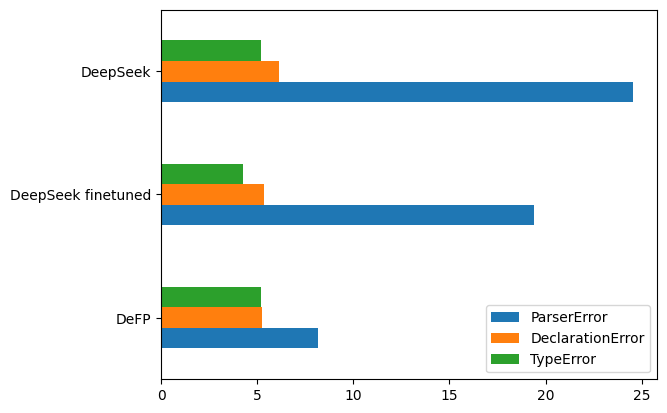

In [36]:
data.plot(kind="barh")
plt.show()

In [ ]:
import pandas as pd
codellama = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compile_info/codellama/deepseek_compile_error.parquet", "fastparquet")
codellama.to_csv("codellama.csv", index=False)